In [29]:
!pip install scikit-fuzzy

In [30]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

names = ['low', 'normal', 'high']

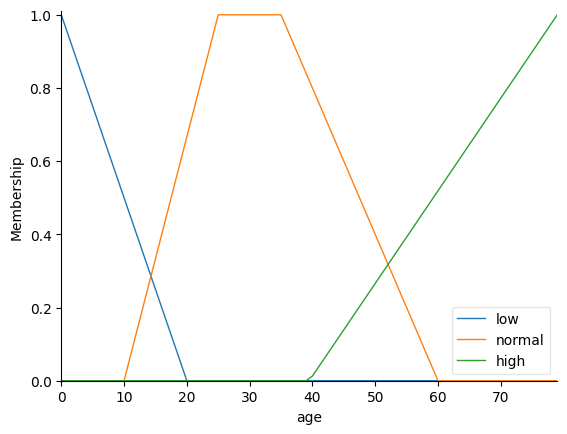

In [31]:
# FUSSIFICATION
MIN = 0; MAX = 80
age = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'age')
age.automf(3, names=names)
age['low'] = fuzz.membership.trimf(np.arange(MIN,MAX, 1), [0,0,20])
age['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [10,25,35,60])
age.view()
## NOTE that not all support point sum up to 1 (which may be an issue!!! (correct it) 

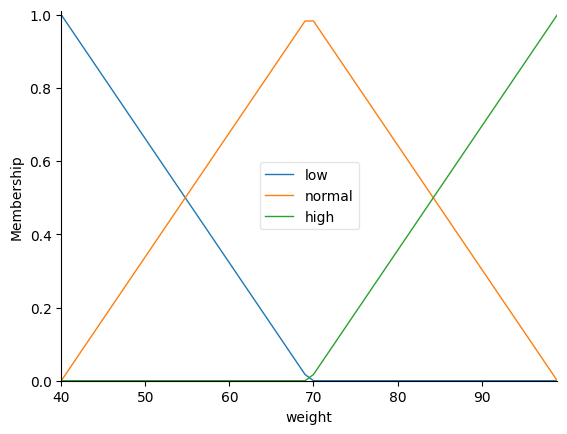

In [32]:
MIN = 40; MAX = 100
weight = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'weight')
weight.automf(3, names=names)
weight.view()

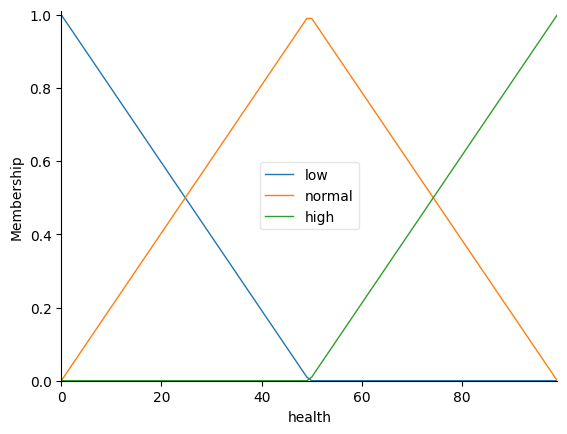

In [33]:
MIN = 0; MAX = 100
health = ctrl.Consequent(np.arange(MIN,MAX, 1), 'health')
health.automf(3, names=names)
health.view()

In [34]:
## FUZZY RULES
rule1 = ctrl.Rule(weight['normal'], health['high'])
rule2 = ctrl.Rule(weight['low'] & age['high'], health['low'])
rule3 = ctrl.Rule(weight['low'] | age['low'], health['normal'])
rule4 = ctrl.Rule(weight['high'], health['low'])
problem_ctrl  = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
problem = ctrl.ControlSystemSimulation(problem_ctrl)

44.85946349382434


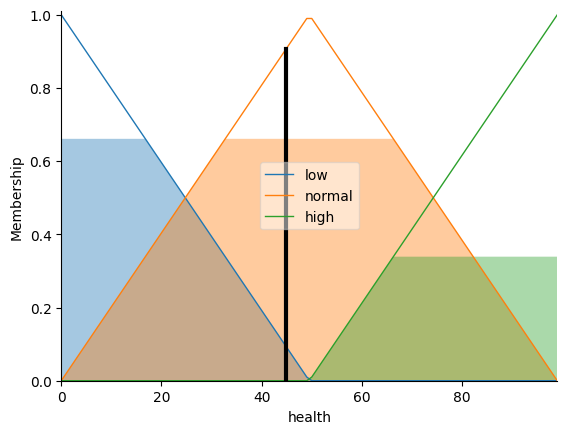

In [37]:
## APPLICATION
problem.input['age'] = 90
problem.input['weight'] = 50

problem.compute()

print(problem.output['health'])
health.view(sim=problem)